



Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Data Sets

In [2]:

df = pd.read_csv("datasets/garments_worker_productivity.csv")
df = df.drop(columns=['wip'])
df.head(10)


,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,6900,45,0.0,0,0,57.5,0.750428


Correlation analysis


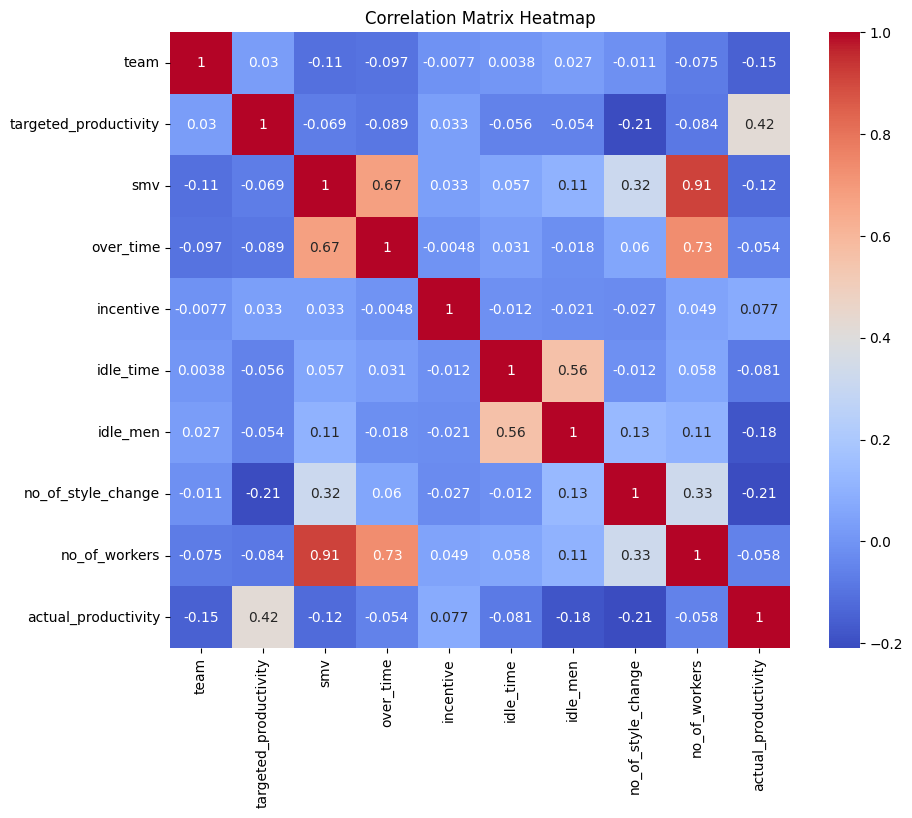

In [3]:

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title("Correlation Matrix Heatmap")
plt.show()

Descriptive analysis


In [4]:

df.describe()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Checking for null values


In [5]:

null_values = df.isnull().sum()
print(null_values)

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


In [6]:

df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [7]:

df['month'] = df['date'].dt.month

In [8]:

print(df.columns)

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity', 'month'],
      dtype='object')


Handling Date & department column


In [9]:

df['department'] = df['department'].str.strip().str.lower()

df['department'] = df['department'].replace({'finishing': 'finishing', 'sweing': 'sewing'})

In [10]:

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.month
df = df.drop(columns=['date'])

df['department'] = df['department'].str.strip().str.lower()
df['department'] = df['department'].replace({'finishing  ': 'finishing', 'sweing': 'sewing'})


print(df.head())

    quarter department       day  team  targeted_productivity    smv  \
0  Quarter1     sewing  Thursday     8                   0.80  26.16   
1  Quarter1  finishing  Thursday     1                   0.75   3.94   
2  Quarter1     sewing  Thursday    11                   0.80  11.41   
3  Quarter1     sewing  Thursday    12                   0.80  11.41   
4  Quarter1     sewing  Thursday     6                   0.80  25.90   

   over_time  incentive  idle_time  idle_men  no_of_style_change  \
0       7080         98        0.0         0                   0   
1        960          0        0.0         0                   0   
2       3660         50        0.0         0                   0   
3       3660         50        0.0         0                   0   
4       1920         50        0.0         0                   0   

   no_of_workers  actual_productivity  month  
0           59.0             0.940725      1  
1            8.0             0.886500      1  
2           30.5 

Handling Categorical Values and Splitting data into train and test

In [11]:

class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns
        self.encoders = {}

    def fit_transform(self, X):
        if self.columns is not None:
            for col in self.columns:
                le = LabelEncoder()
                X[col] = le.fit_transform(X[col])
                self.encoders[col] = le
        return X

                          # Define categorical columns
categorical_columns = ['quarter', 'department', 'day']

                        # Encode categorical data
encoder = MultiColumnLabelEncoder(columns=categorical_columns)
df = encoder.fit_transform(df)

print(df.head())

                                # Splitting Data
X = df.drop(columns=['actual_productivity'])
y = df['actual_productivity']

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)



   quarter  department  day  team  targeted_productivity    smv  over_time  \
0        0           1    3     8                   0.80  26.16       7080   
1        0           0    3     1                   0.75   3.94        960   
2        0           1    3    11                   0.80  11.41       3660   
3        0           1    3    12                   0.80  11.41       3660   
4        0           1    3     6                   0.80  25.90       1920   

   incentive  idle_time  idle_men  no_of_style_change  no_of_workers  \
0         98        0.0         0                   0           59.0   
1          0        0.0         0                   0            8.0   
2         50        0.0         0                   0           30.5   
3         50        0.0         0                   0           30.5   
4         50        0.0         0                   0           56.0   

   actual_productivity  month  
0             0.940725      1  
1             0.886500      1  
2 

Model Building


Linear Regression


In [12]:

df.fillna(df.mean(), inplace=True)

X = df.drop(columns=['actual_productivity'])
y = df['actual_productivity']
X_array = X.values

X_train, X_test, y_train, y_test = train_test_split(X_array, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)
pred_test = model_lr.predict(X_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2 = r2_score(y_test, pred_test)



RandomForestRegression


In [13]:

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

model_rf.fit(X_train, y_train)

pred = model_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, pred)
mse_rf = mean_squared_error(y_test, pred)
r2_rf = r2_score(y_test, pred)


Xgboost Model


In [14]:

model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

model_xgb.fit(X_train, y_train)

pred3 = model_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, pred3)
mse_xgb = mean_squared_error(y_test, pred3)
r2_xgb = r2_score(y_test, pred3)



Compare These Model


In [15]:
model_performance = {
    "Linear Regression": {"MAE": mae, "MSE": mse, "R² Score": r2},
    "Random Forest": {"MAE": mae, "MSE": mse, "R² Score": r2},
    "XGBoost": {"MAE": mae, "MSE": mse, "R² Score": r2},
}

best_model_name = max(model_performance, key=lambda k: model_performance[k]["R² Score"])
best_model = {"Linear Regression": model_lr, "Random Forest": model_rf, "XGBoost": model_xgb}[best_model_name]


Save the best model as a .pkl file

In [16]:

import pickle
pred_xgb = model_xgb.predict(X_test)

r2_xgb = r2_score(y_test, pred_xgb)
# Save the best model
model_filename = "best_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(model_xgb, file)



In [17]:
import pickle

try:
    model = pickle.load(open('best_model.pkl', 'rb'))
    print("Model successfully loaded.")
except Exception as e:
    print(f"Error loading model: {e}")

Model successfully loaded.
